Name: Aditi Aher
PRN: 121B1B007

**This project involves vehicle detection using a combination of YOLO for object detection, a CNN model for feature extraction, transfer learning for enhanced model performance, and a GAN model to generate synthetic vehicle images**.

**Step 1: YOLO for Vehicle Detection**

In [7]:
!pip install -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 15.3 MB/s eta 0:00:00


In [8]:
!unzip /content/Vehicle_dataset.zip

Archive:  /content/Vehicle_dataset.zip
   creating: Vehicle_dataset/
   creating: Vehicle_dataset/images/
   creating: Vehicle_dataset/images/test/
  inflating: Vehicle_dataset/images/test/img1027.jpg  
  inflating: Vehicle_dataset/images/test/img1028.jpg  
  inflating: Vehicle_dataset/images/test/img1030.jpg  
  inflating: Vehicle_dataset/images/test/img1037.jpg  
  inflating: Vehicle_dataset/images/test/img1038.jpg  
  inflating: Vehicle_dataset/images/test/img1040.jpg  
  inflating: Vehicle_dataset/images/test/img1047.jpg  
  inflating: Vehicle_dataset/images/test/img1048.jpg  
   creating: Vehicle_dataset/images/train/
  inflating: Vehicle_dataset/images/train/10.jpg  
  inflating: Vehicle_dataset/images/train/100.jpg  
  inflating: Vehicle_dataset/images/train/1001.jpeg  
  inflating: Vehicle_dataset/images/train/1002.jpeg  
  inflating: Vehicle_dataset/images/train/1003.jpeg  
  inflating: Vehicle_dataset/images/train/1004.jpeg  
  inflating: Vehicle_dataset/images/train/1005.jpe

In [11]:
!pip install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install -U matplotlib


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 17022 (delta 122), reused 131 (delta 71), pack-reused 16805 (from 1)
Receiving objects: 100% (17022/17022), 15.74 MiB | 21.87 MiB/s, done.
Resolving deltas: 100% (11660/11660), done.
/content/yolov5


In [17]:
yaml_content = '''
train: Vehicle_dataset/images/train
val: /content/Vehicle_dataset/images/val
nc: 5
names: ['Car', 'Motorcycle', 'Truck', 'Bus', 'Bicycle']
'''

with open('data.yaml', 'w') as f:
    f.write(yaml_content)


In [19]:
!python train.py --img 640 --batch 16 --epochs 3 --data data.yaml --weights yolov5s.pt


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-10-23 05:43:45.244636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 05:43:45.270914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 05:43:45.278141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [23]:
!python val.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --data data.yaml --img-size 640


val: data=data.yaml, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/Vehicle_dataset/labels/val.cache... 117 images, 0 backgrounds, 0 corrupt: 100% 117/117 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [01:16<00:00, 19.00s/it]
                   all        117        285      0.498      0.374      0.292      0.158
                   Car        117        225      0.279      0.867      0.571      0.285
            Motorcycle        117         19    

In [24]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --source /content/Vehicle_dataset/images/test --img-size 640


detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=/content/Vehicle_dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/Vehicle_dataset/images/test/img1027.jpg: 640x640 1 Car, 1 Bus, 435.3ms
image 2/8 /content/Vehicle_dataset/images/test/img1028.jpg: 640x640 (no detections), 448.5ms
image 3/8 /content/Vehicle_dataset/images/test/img1030.jpg: 640x640 5 Cars, 395.0ms
image 4/8 /content/Vehicle_dataset/im

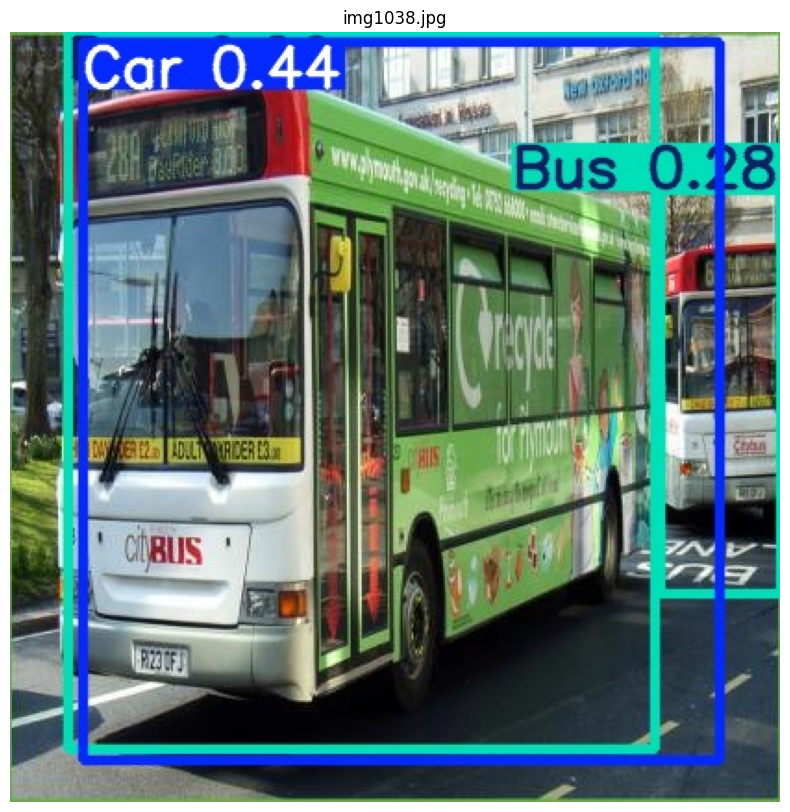

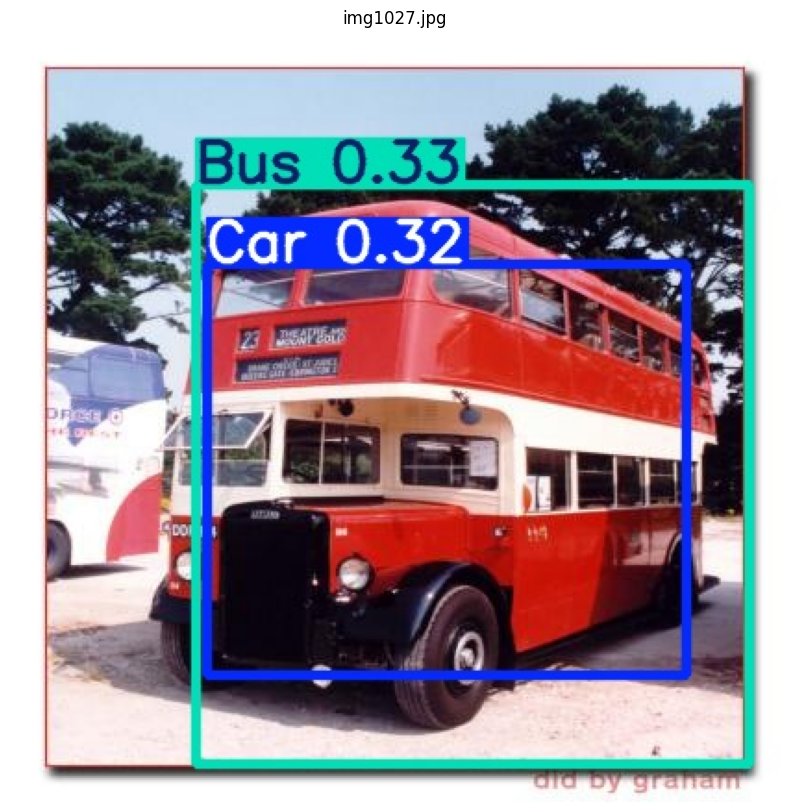

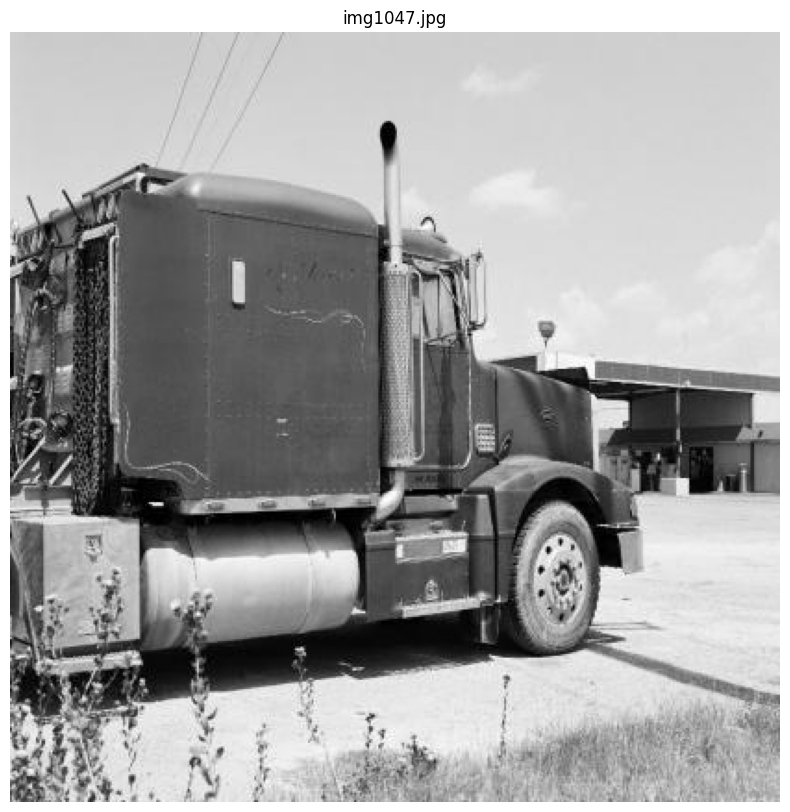

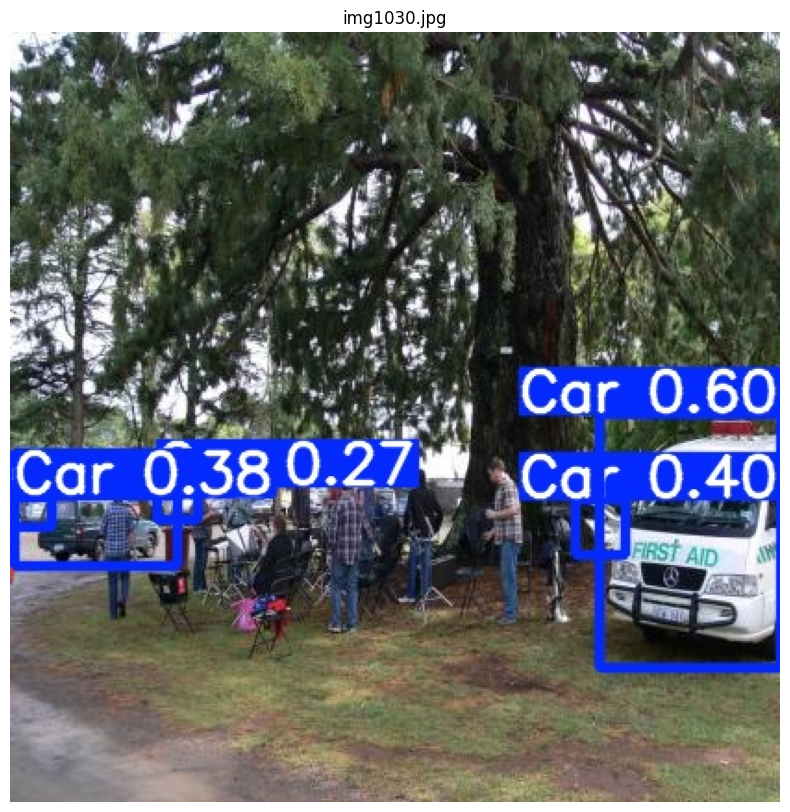

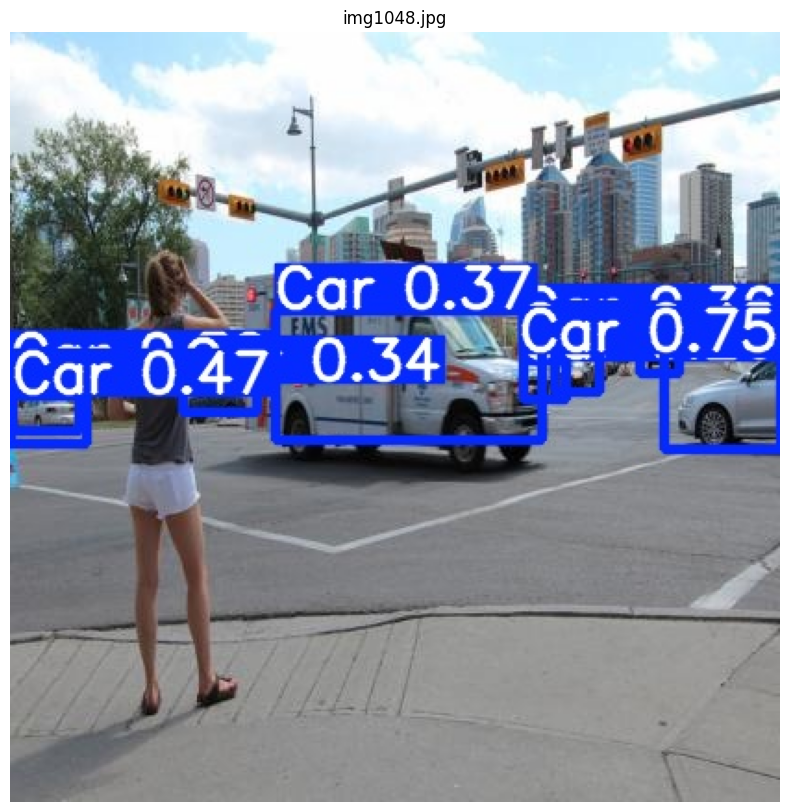

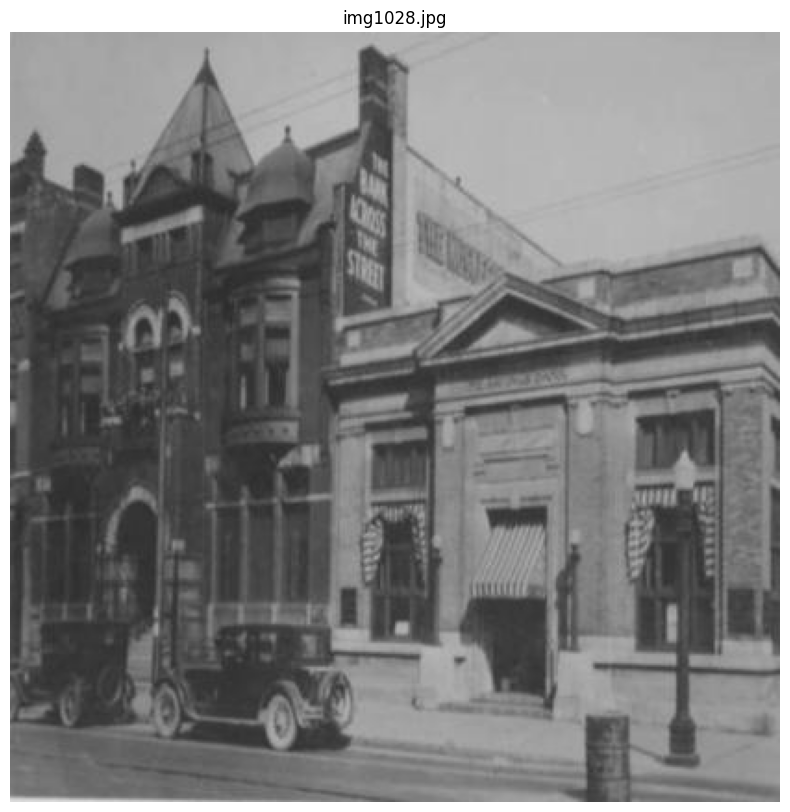

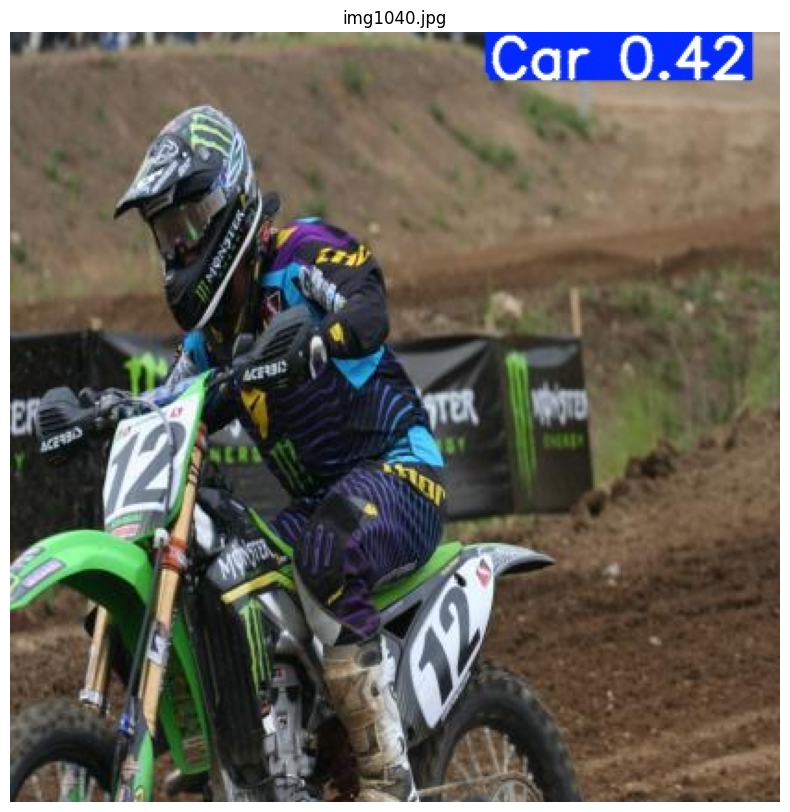

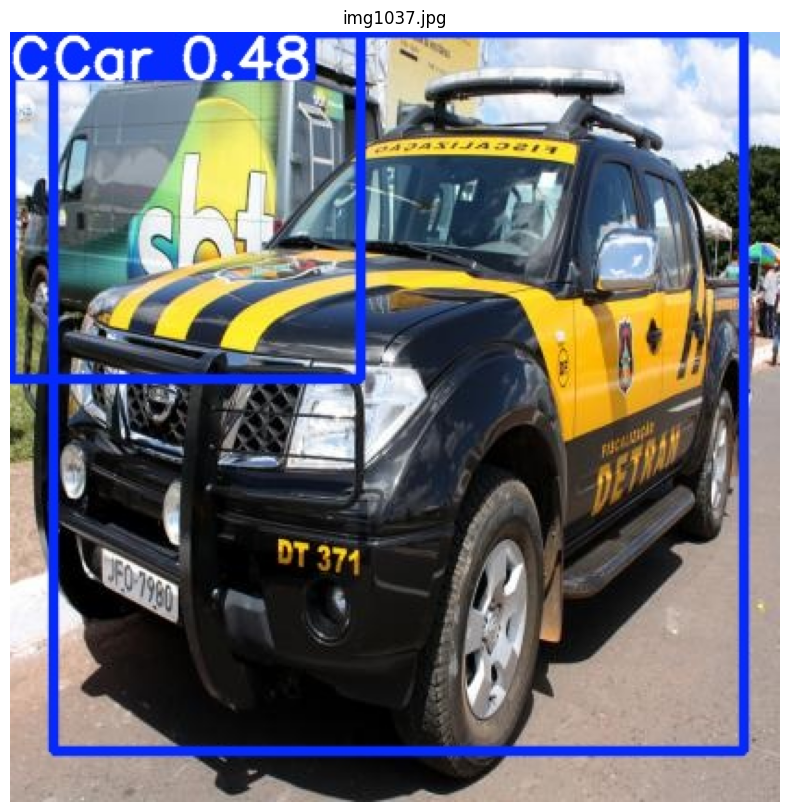

In [25]:
import matplotlib.pyplot as plt
import cv2
import os

# Path to the output directory with detected images
output_dir = '/content/yolov5/runs/detect/exp'  # Change if your output path is different

# List all the output images
output_images = os.listdir(output_dir)

# Display the detected images
for image_file in output_images:  # Change the number to display more or fewer images
    img_path = os.path.join(output_dir, image_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.title(image_file)  # Show the image file name as title
    plt.show()


In [26]:
!pip install tensorflow


**Step 2: Transfer Learning**

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
import numpy as np
import matplotlib.pyplot as plt


In [28]:
# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [34]:
import torch
import os
from torchvision import transforms
from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_name).convert("RGB")

        # Load the label
        label_name = self.image_files[idx].replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
        label_path = os.path.join(self.label_dir, label_name)

        # Read labels
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                labels = [list(map(float, line.strip().split())) for line in f.readlines()]
        else:
            labels = []  # Return empty if no labels found

        if self.transform:
            image = self.transform(image)

        # Process labels into a suitable format
        labels_tensor = torch.tensor(labels) if labels else torch.empty((0, 5))  # Shape: [num_boxes, 5]

        return image, labels_tensor

def collate_fn(batch):
    images, labels = zip(*batch)
    images = torch.stack(images)  # Stack images
    # Pad labels to the max length in this batch
    max_length = max(label.shape[0] for label in labels)
    padded_labels = [torch.cat([label, torch.zeros(max_length - label.shape[0], 5)]) for label in labels]
    return images, torch.stack(padded_labels)

# Example usage
transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
])

# Update paths as needed
train_dataset = CustomDataset('/content/Vehicle_dataset/images/train', '/content/Vehicle_dataset/labels/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# Check if the dataset is working
for images, labels in train_loader:
    print(f'Batch size: {images.size()}')  # Should print a consistent size
    print(f'Labels: {labels}')  # Check the labels tensor
    break


Batch size: torch.Size([32, 3, 640, 640])
Labels: tensor([[[0.0000, 0.4633, 0.0699, 0.1267, 0.1303],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.8167, 0.4929, 0.1187, 0.1896],
         [0.0000, 0.6927, 0.4739, 0.1053, 0.1469],
         [0.0000, 0.1353, 0.5427, 0.2707, 0.5118],
         [0.0000, 0.9107, 0.4431, 0.0587, 0.0758],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.6604, 0.0992, 0.1125, 0.0641],
         [0.0000, 0.4917, 0.2344, 0.1639, 0.1187],
         [0.0000, 0.8917, 0.2957, 0.2167, 0.1367],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.6060, 

**Step 3: CNN model training**


In [82]:
import tensorflow as tf

# Define the input shape
input_shape = (224, 224, 3)  # Adjust dimensions as needed

# Create a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),  # Use Input layer here
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Ensure num_classes is defined
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [85]:
epochs = 10

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Reshape


In [93]:
num_boxes = 11
values_per_box = 5

# Define your model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dense(num_boxes * values_per_box, activation='sigmoid'))  # Ensure this matches your label structure
model.add(Reshape((num_boxes, values_per_box)))  # Reshape the output to match your label shape

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])  # Change loss function if necessary

# Fit the model
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels))


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.5448 - loss: 0.1990 - val_accuracy: 0.7438 - val_loss: 0.1241
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.7487 - loss: 0.1124 - val_accuracy: 0.7438 - val_loss: 0.1241
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7491 - loss: 0.1129 - val_accuracy: 0.7438 - val_loss: 0.1241
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7443 - loss: 0.1095 - val_accuracy: 0.7438 - val_loss: 0.1241
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7462 - loss: 0.1146 - val_accuracy: 0.7438 - val_loss: 0.1241
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7448 - loss: 0.1140 - val_accuracy: 0.7438 - val_loss: 0.1241
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.7476 - loss: 0.1147 - val_accuracy: 0.7438 - val_loss: 0.1241
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7470 - loss: 0.1148 - val_accuracy: 0.7438 - val_loss

In [94]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1577088)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 55)                  │      86,739,895 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 11, 5)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,222,375 (992.67 MB)

 Trainable params: 86,740,791 (330.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 173,481,584 (661.78 MB)

**Step 5: Visualization**

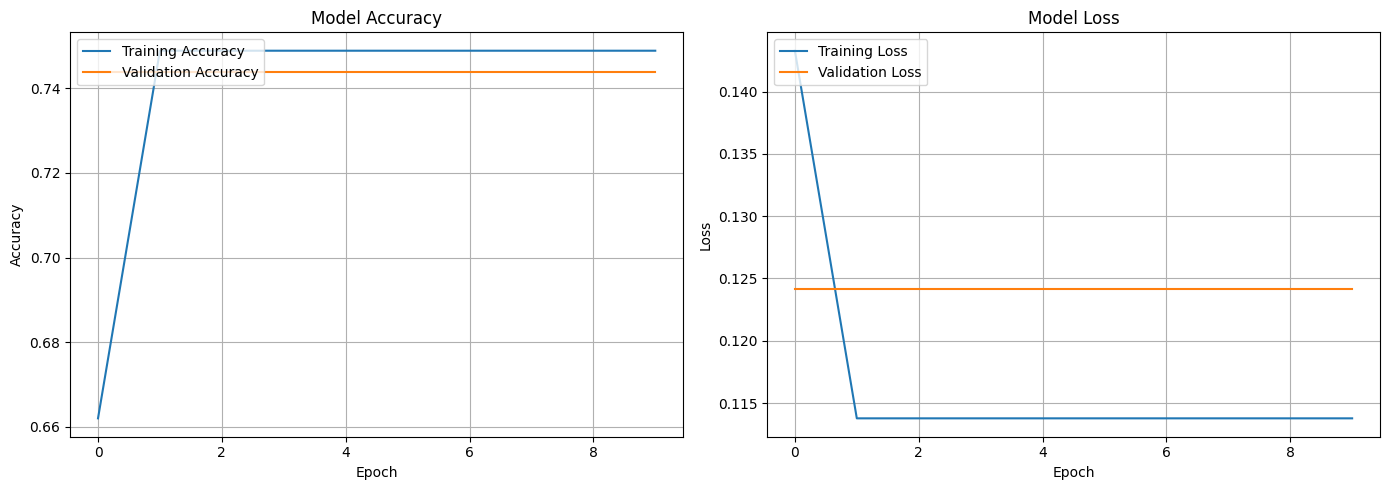

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()


**Step 6:Building and Training the GAN Model**

In [129]:

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os


In [142]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Function to load images from a directory
def load_images_from_directory(directory, target_size=(64, 64)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).resize(target_size)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images)

# Load images from the directory and preprocess them
image_directory = '/content/Vehicle_dataset/images/train'
vehicle_detection = load_images_from_directory(image_directory)

# Preprocess the images (normalize them to [-1, 1] for GAN)
def preprocess_images(images):
    images = images.astype('float32')
    images = (images - 127.5) / 127.5
    return images

vehicle_detection = preprocess_images(vehicle_detection)

# Batch and shuffle the dataset for GAN training
BATCH_SIZE = 64
BUFFER_SIZE = 1000
dataset = tf.data.Dataset.from_tensor_slices(vehicle_detection).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [143]:
# Generator model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))  # Noise vector of size 100
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

generator = build_generator()

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = build_discriminator()


In [144]:
# Define loss functions and optimizers for both generator and discriminator
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [145]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss


In [147]:
import tensorflow as tf

Epoch 1, Gen Loss: 2.7833409309387207, Disc Loss: 0.23657330870628357


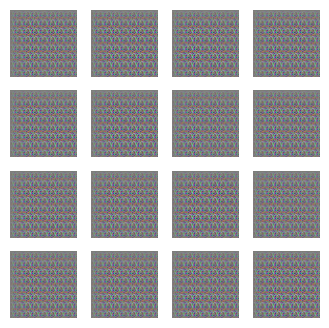

Epoch 2, Gen Loss: 2.1054391860961914, Disc Loss: 0.1707208752632141


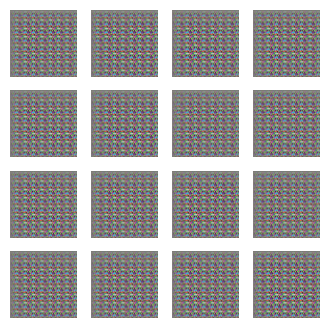

Epoch 3, Gen Loss: 2.688555955886841, Disc Loss: 0.07990337163209915


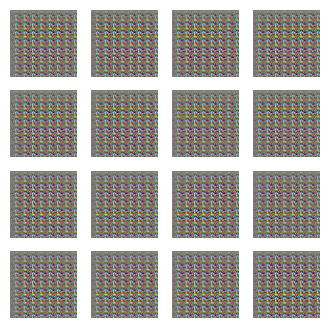

Epoch 4, Gen Loss: 3.26723051071167, Disc Loss: 0.10146667063236237


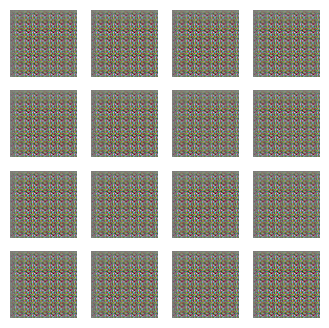

Epoch 5, Gen Loss: 4.173076629638672, Disc Loss: 0.016966084018349648


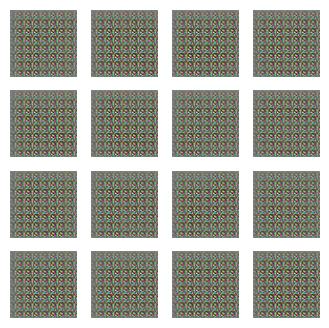

In [149]:
# Function to generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        img = tf.clip_by_value(predictions[i] * 127.5 + 127.5, 0, 255).numpy().astype(np.uint8)
        plt.imshow(img)
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.jpg'.format(epoch))
    plt.show()

# Training function
def train(dataset, epochs):
    seed = tf.random.normal([16, 100])  # Seed for generating images

    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f'Epoch {epoch + 1}, Gen Loss: {gen_loss}, Disc Loss: {disc_loss}')
        generate_and_save_images(generator, epoch + 1, seed)

EPOCHS = 5
train(dataset, EPOCHS)


In [151]:

generator.save('generator_model.keras')
discriminator.save('discriminator_model.keras')
